In [2]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as pc
from gaussxw import gaussxwab, gaussxw
from timeit import default_timer as timer
import scipy.integrate as integrate 

# TP1 : Parcours des protons dans la matière

## Charles Fortier et Élie Dumas-Lefebvre

### Travail présenté à Philippe Després 
### Dans le cadre du cours PHY-3500 Physique numérique




## 1.

   \cite{newhauser2015physics} nous informe que l'énergie cinétique des protons utilisés en protonthérapie varie entre 11 et 220 MeV, énergies correspondant à des distances de pénétration respectives de 1mm et 30 cm. Cette dernière étant la plus creuse que nous pouvons atteindre, on en déduit que l'énergie maximale typiquement utilisée est 220 MeV. Malgré le fait que l'énergie maximale typique est de 220 MeV, \cite{newhauser2015physics} mentionne aussi qu'elle peut atteindre 250 MeV dans certains cas.

### Relation entre le facteur de Lorentz $\gamma$ et l'énergie du proton $T$
l'énergie totale d'un proton est la somme de son énergie de masse au repos et de son énergie cinétique tel que,

\begin{align}
E = m_p c^2 + T
\end{align}

Par contre, l'énergie totale d'un proton en mouvement est aussi éagale à $\gamma m_p c^2$. On peut ainsi écrire, 

\begin{align}
E = \gamma m_p c^2 &= m_p c^2 + T\\
\Rightarrow\ T &=  m_p c^2 (\gamma - 1)
\end{align}

Bref, en considérant la masse du proton en électron-Volts, on peut réécrire l'énergie cinétique $T$ comme,

\begin{align}
T =  m_p (\gamma - 1)\ \ [eV]
\end{align}

 
### Relation entre le facteur de Lorentz $\gamma$ et la vitesse réduite $\beta$  

Sachant que $\gamma$ et $\beta$ sont définit comme,

\begin{align}
\gamma = \frac{1}{\sqrt{1-v^2/c^2}}, \ \ \beta = \frac{v}{c}
\end{align}

leur relation s'exprime comme

\begin{align}
\Rightarrow\ \gamma = \frac{1}{\sqrt{1-\beta^2}}, \ \ \beta = \sqrt{\frac{\gamma^2 - 1}{\gamma^2}}
\end{align}

## 2. 
Dimensionnellement, la densité électronique s'exprime comme le nombre d'électrons contenu par unité de volume, i.e. 

\begin{align}
n_e = \left[\frac{\text{Nombre d'électrons}}{cm^3}\right]
\end{align}

La masse atomique est égale au nombre de nucléons présents dans l'atome. Par exemple, la masse molaire de l'eau se calcule comme suit,

\begin{align}
M_{H_2 O} = 2\times M_H + M_O = 2\times 1 + 16 = 18\ g\cdot mol^{-1}
\end{align}

Ainsi, la masse atomique d'une molécule s'exprime comme la masse de chacun de ses atomes, i.e.

\begin{align}
M = \sum_{i=1}^{k} c_i M_i,
\end{align}

où $k$ est le nombre d'atomes, $M_i$ leur masse atomique et $c_i$, le nombre d'atome du même type. De plus, le nombre d'électron présent dans une molécule est égal au nombre total de protons, 

\begin{align}
\frac{Nombre\ d'électron}{molécule} = \sum_{i=1}^{k} c_i Z_i
\end{align}

Bref, par analyse dimensionelle, on peut exprimer la densité électronique comme:

\begin{align}
n_e &\doteq \left[\frac{Nombre\ de\ molécule}{mol}\right]\cdot\left[\frac{mol}{g}\right]\cdot\left[\frac{Nombre\ d'électron}{molécule}\right]\cdot\left[\frac{g}{cm^3}\right] \\
\Rightarrow\ n_e &= N_a \rho \frac{\sum_{i=1}^{k}c_i Z_i}{\sum_{i=1}^{k}c_i M_i} \label{dens}
\end{align}

On a ainsi que, pour l'eau, avec un nombre d'électrons de 10, un nombre de nucléons de 18 et une densité de 1 $g\;cm^{-3}$, la densité électronique telle que

\begin{align}
n_e{_{H_2 O}} = N_a\cdot (1)\cdot \frac{10}{18} = \frac{5}{9}N_a\ \ [g\;cm^{-2}]
\end{align}

Passons maintenant à l'os cortical. Les données fournies par le NIST \cite{NIST}, ne nous informent pas directement sur le nombre d'atome $c_i$ présent dans la molécule, mais plutôt le ratio de masse entre l'atome et la molécule appelé la fraction par poids ($F_{pp}$). On peut obtenir $c_i$ en inversant la définition de la $F_{pp}$, 

\begin{align}
F_{pp_i} = \frac{c_i M_i}{M_{tot}} \Rightarrow\ c_i = \frac{F_{pp_i} M_{tot}}{M_i}
\end{align}

En substituant cette définition de $c_i$ dans \eqref{dens}, on obtient l'expression suivante pour la densité électronique,

\begin{align}
n_e = N_a \rho \sum_{i=1}^{n} \frac{F_{pp_i} Z_i}{M_i}
\end{align}

Avec les données fournies par le NIST \cite{NIST}, les masses atomiques des atomes d'intérêt prises sur le tableau périodique des éléments [REF] et la densité de l'os cortical de 1,85 $g/cm^3$, on obtient que la densité électronique de l'os cortical est,

\begin{align}
n_e{_{cort}} \approx 0,96438 N_a\ \ [g\;cm^{-2}]
\end{align}

Comme la gamme d'énergie typique utilisée en proton thérapie va de 11 MeV à 220 MeV, il est légitime de négliger les termes de correction du pouvoir d'arrêt collisionnel. On peut donc exprimer celui-ci comme,

\begin{align}
S_{col}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2}\left[\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right) - 2\beta^2\right]
\end{align}

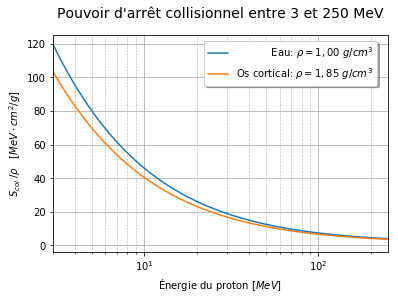

In [3]:
%matplotlib inline

# Définition des paramètres utilisés dans les calculs
r_e = pc['classical electron radius'][0] * 100  # Conversion de m à cm
N_a = pc['Avogadro constant'][0]

n_e_eau = 5*N_a/9
n_e_cort = 0.96438*N_a

I_eau = 75e-6
I_cort = 106.4e-6 
 
rho_cort = 1.85


def get_gamma(T, m_p=938.272):
    return T/m_p + 1

def get_beta(gamma):
    return np.sqrt((gamma**2 - 1)/gamma**2)

def get_Te_max(gamma, m_e=0.511, m_p=938.272):
    return (2*m_e*(gamma**2 - 1)/(1 + 2*gamma*m_e/m_p + (m_e/m_p)**2))

def get_s_col(r_e, n_e, T, I, m_e=0.511):
    
    """ Retourne le pouvoir d'arrêt collisonnel d'un matériau
    
    :params:---------------Description---------------: Unités :
           
        r_e: Rayon électronique                          cm 
        n_e: Densité électronique du matériau          cm^{-3}
       beta: Facteur de vitesse réduite                  -
      gamma: Facteur de Lorentz                          -
          T: Énergie du proton                           MeV
     Te_max: Énergie maximale transférable p+ -> e-      MeV
          I: Énergie moyenne d'excitation du matériau    MeV
        m_e: Masse de l'électron                         MeV
    """
    
    gamma = get_gamma(T)
    beta = get_beta(gamma)
    Te_max = get_Te_max(gamma)
    
    return 2*np.pi*r_e**2*m_e*n_e*beta**(-2)*(np.log((2*m_e*beta**2*gamma**2*Te_max)/(I**2)) - 2*beta**2)

T = np.linspace(3, 10000, 100000)

s_col_eau = get_s_col(r_e, n_e_eau, T, I_eau)
s_col_cort = get_s_col(r_e, n_e_cort, T, I_cort)

p_col_cort = s_col_cort/rho_cort

#Gestion de l'affichage 
ax = plt.subplot(111)
plt.plot(T, s_col_eau, label=r"           Eau: $\rho = 1,00\ g/cm^3$")
plt.plot(T, p_col_cort, label=r"Os cortical: $\rho = 1,85\ g/cm^3$")
plt.xscale('log')
plt.grid('True', which='Major')
plt.grid('True', which='Minor', ls='--', linewidth=0.6)
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S_{col}\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.xlim([3,250])
plt.title("Pouvoir d'arrêt collisionnel entre 3 et 250 MeV", y=1.05, fontsize=14)
ax.legend(bbox_to_anchor=(0.45, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.show()

Avec la figure ci-haut, on remarque que plus l'énergie du proton augmente, plus l'approximation de l'os cortical comme étant de l'eau est valide à cause de la diminution de l'écart de pouvoir d'arrêt collisionnel, celui-ci passant d'environ $20\ MeV\cdot cm^2/g$ à moins de $1\ MeV\cdot cm^2/g$.

## 3.

l'approximation CSDA considère qu'un proton pénétrant la matière subit une décélération continue tout au long de son parcours. Suite à cette décélération, le proton se sera forcément arrêté à une distance que l'on appelle la portée par CSDA ($R_{CSDA}$). Cette portée s'exprime mathématiquement comme, 

\begin{align}
R_{CSDA} = \int_0^{T_i} \frac{dT'}{\frac{S_{col}}{\rho}} \label{porte}
\end{align}

Mais quelles sont les dimensions de la portée $R_{CSDA}$ ? Pour le trouver, procédons à l'analyse dimensionnelle du côté droit de (\ref{porte}). D'abord, 

\begin{align}
\frac{S_{col}}{\rho} = -\left(\frac{dT}{\rho dx}\right) \doteq \left[J(kg\;m^{-3})^{-1}m\right] = \left[J\;kg^{-1}m^2\right]
\end{align}

l'intégrande de (\ref{porte}) a donc des unités de,

\begin{align}
\frac{dT'}{\frac{S_{col}}{\rho}} &\doteq \left[J(J\;kg^{-1}m^2)^{-1}\right] = \left[kg\;m^{-2}\right]\\
R_{CSDA} &\doteq \left[kg\;m^{-2}\right]
\end{align}

Donc, si on cherche à avoir la portée en mètres dans un matériau quelconque, comme l'eau par exemple, il nous faudra diviser $R_{CSDA}$ par la densité de ce dernier, i.e.
\begin{align}
\frac{R_{CSDA}}{\rho} \doteq \left[m\right]
\end{align}

Bref, comme les valeurs de $\frac{S_{col}}{\rho}$ sont souvent fournies dans des tables de données, la portée des protons dans la matière est d'abord définie de façon générale par (\ref{porte}). On peut ensuite obtenir une portée plus "\textit{intuitive}" du proton en divisant par la densité de la matière d'intérêt.

## 4. 

Une particule traversant la matière est soumises à de nombreuses forces. Elle interagira non seulement avec les noyaux atomiques présent dans le matériau en question, mais aussi avec les électrons et si son énergie est assez grande, le rayonnement de freinage entrera en jeu.  Dans notre cas, on approxime la perte d'énergie du proton comme étant linéaire tout au long de son parcours à travers la matière et étant seulement causée par les collisions avec les électrons. Cette approximation est elle juste ? C'est ce que nous allons voir en comparant notre résultat pour le pouvoir d'arrêt collisionnel avec le pouvoir d'arrêt total obtenu des données du PSTAR \cite{NIST}.


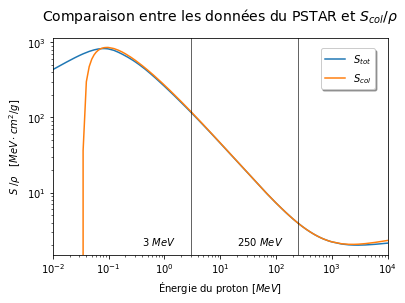

In [4]:
%matplotlib inline

data = np.loadtxt('S_tot_pstar.txt')

T_pstar = data[:, 0]
s_tot = data[:, 1]

s_col_eau = get_s_col(r_e, n_e_eau, T_pstar, I_eau)

ax = plt.subplot(111)
plt.plot(T_pstar, s_tot, label=r"$S_{tot}$")
plt.plot(T_pstar, s_col_eau, label=r"$S_{col}\quad$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$S\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.axvline(3, c='k', linewidth=0.6)
plt.axvline(250, c='k', linewidth=0.6)
plt.text(0.4, 2, r'$ 3\ MeV$')
plt.text(20, 2, r'$ 250\ MeV$')
plt.xlim([1e-2, 1e4])
ax.legend(bbox_to_anchor=(0.8, 0.95), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.title(r"Comparaison entre les données du PSTAR et $S_{col}/\rho$", y=1.05, fontsize=14)
plt.show()

In [ ]:
def get_rms(data1, data2):
    rms = np.sqrt(np.mean((data1-data2)**2))
    return rms
i_small, i_3, i_250, i_1000 = np.where(T_pstar == 1e-1)[0][0], np.where(T_pstar == 3)[0][0],\
                              np.where(T_pstar == 250)[0][0], np.where(T_pstar == 10000)[0][0]

rms_min_small = get_rms(s_tot[:i_small+1], s_col_eau[:i_small+1])
rms_min_3 = get_rms(s_tot[:i_3+1], s_col_eau[:i_3+1]  )
rms_3_250 = get_rms(s_tot[i_3:i_250+1], s_col_eau[i_3:i_250+1])
rms_250_1000 = get_rms(s_tot[i_250:i_1000+1], s_col_eau[i_250:i_1000+1])
rms_1000_max = get_rms(s_tot[i_1000:], s_col_eau[i_1000:])

| Plage d'énergie | RMS |
|:-------:|:-------------:|
| $[MeV]$ | $[MeV\cdot cm^2/g]$ | 
| $10^{-2}$ - $10^{-1}$ | 62502,17| 
| $10^{-2}$ - $3$ | 46284,76 |
|  $3$ - $250$| 0,660334 |
| $250$ - $10^{2}$| 0,071923 |
| $250$ - $10^{4}$| 0,181319 |
 

À partir de ce graphique et des valeurs RMS calculées, il nous est possible de faire 3 constats principaux: 

D'abord, on voit que l'approximation linéaire a un écart considérable avec le pouvoir d'arrêt total pour des énergies entre $10^{-2}$ et $3\ MeV$ avec un RMS dépassant les 46 $GeV\cdot cm^2/g$. Cela s'explique par le fait que l'interaction entre le proton et les noyaux atomiques, mécanisme dominant pour les faibles énergies, est négligée par notre approximation . Il en résulte ainsi une sous estimation du pouvoir d'arrêt réel. 

Par la suite pour la plage d'énergie utilisées en protonthérapie, soit entre $3$ et $250\ MeV$, on remarque autant qualitativement que quantitativement (RMS faible), que l'approximation linéaire modélise bien la réalité, ce qui s'explique par une prédominance du processus collisionnel dans cette gamme d'énergie.

Enfin, malgré un RMS faible entre le pouvoir d'arrêt collisionnel et celui total pour les énergies plus grande que $250\ MeV$, on remarque qualitativement un séparation entre les 2 comportements. Cette séparation a du sens étant donné qu'à de hautes énergies, l'effet Bremsstrahlung sera présent et contribuera ainsi à une augmentation du pouvoir d'arrêt total.

## 5.

Lorsqu'on substitue les $\gamma$ et les $\beta$ pour observer la dépendence en énergie cinétique de $\frac{\rho}{Scol}$, on arrive à l'expression:
$$\frac{\rho}{Scol} =  \frac{\rho \left(- m_{p}^{2} + \left(T + m_{p}\right)^{2}\right)}{2 \pi m_{e} n_{e} r_{e}^{2} \left(2 m_{p}^{2} + \left(T + m_{p}\right)^{2} \left(\log{\left (\frac{4 m_{e}^{2} \left(- m_{p}^{2} + \left(T + m_{p}\right)^{2}\right)^{2}}{I_{x}^{2} m_{p}^{2} \left(m_{e}^{2} + 2 m_{e} \left(T + m_{p}\right) + m_{p}^{2}\right)} \right )} - 2\right)\right)}
$$
En observant l'expression de la dérivée de la portée des protons, on remarque qu'elle n'est pas intégrable analytiquement, au moins sans faire d'énormes approximations. En effet, elle contient le logarithme d'un polynome dépendant de l'énergie cinétique, fonction qui n'est pas intégrable analytiquement pour certain degrés de polynômes. La solution est donc simplement d'évaluer l'intégrale numériquement sur des bornes définies.


## 6.

En exprimant correctement toutes les constantes de $S_{col}$, il est possible d'aller chercher le $R_{CSDA}$ des protons dans la matière en intégrant la fraction $\frac{\rho}{S_{col}}$. On intègre le tout en utilisant la méthode des trapèzes adaptative et une erreur inférieure à $10^{-9}cm$. Pour ce calcul, l'expression est laissée en sympy jusqu'au dernier moment possible pour permettre la réutilisation du code pour le numéro suivant.

Il est important de noter que, comme nous voulons une portée en $cm$ dans le matériau, il et nécessaire de diviser le $R_{CSDA}$ par la densité du matériau. Le calcul revient donc à $$ \text{portée} = \int_{T_f}^{T_i}\frac{dT}{Scol}$$
On note aussi que lors de l'intégration numérique, nous calculons l'erreur d'approximation en utilisant la formule: 
$$ \epsilon_{2N} = \frac{1}{3}\left(I_{2N} - I_{N}\right)$$
On convergera vers un $N$ optimal lorsque cette erreur est inférieure à $1\times 10^{-9}cm$, comme indiqué dans l'énoncé.

Au final, pour une énergie de 220MeV, on converge vers:


|      | Portée| Nombre de trapèzes | Erreur d'approximation|
|:-------:|:-------------:|:----:|:----:|
|eau         |  30,504617 cm | 131 072 |$3,38259\times 10 ^{-10}cm$|
| os cortical |  18,461230 cm | 65 536  |$8,36818\times 10 ^{-10}cm$|



In [6]:

import sympy
from sympy import lambdify

#symboles sympy
re, me, c , ne, bet2, gam, I, rho, mp, T = sympy.symbols("r_e m_e c n_e \\beta^2 \gamma I_x \\rho m_p T")

#constantes
rayon_electron  = 2.8179e-13       #cm
masse_electron  = 0.510998         #Mev
masse_proton    = 938.272          #Mev
nombre_avogadro = 6.0221409e23     #1/mol

#fonctions
facteur_de_lorenz_gamma = lambda T : T/mp + 1
facteur_de_lorenz_beta_carre =  (1- gam**(-2))
Temax = (2*me*(gam**2-1))/(1 + 2*gam*me/mp + me**2/mp**2)
Scol =  2*np.pi*re**2*me*ne/bet2 *(sympy.log(2*me*bet2*gam**2*Temax/I**2) - 2*bet2)
derivRSDCA =  rho/Scol

Scol_subs = lambda densite, densite_electronique, excitation : ((Scol).subs(
                [(bet2, facteur_de_lorenz_beta_carre)
                ,(gam, facteur_de_lorenz_gamma(T))
                ,(re, rayon_electron)
                ,(me, masse_electron)
                ,(ne, densite_electronique)
                ,(mp, masse_proton)
                ,(I, excitation)
                ,(rho, densite)]))

#fonction qui entre les constantes dans l'équation puis simplifie la substitutions des autres variables
derivRSDCA_subs = lambda densite, densite_electronique, excitation :  rho/Scol_subs(densite, densite_electronique, excitation)/rho


#méthode des trapezes générale
def integral_trapese(fonction, resolution, debut, fin):
    trapeze = lambda values, interval: interval * (values[0] / 2 + np.sum(values[1:-1]) + values[-1] / 2)
    nombre = 1
    prev = 0
    output_change = 1.337
    while abs(output_change) / 3 > resolution :
        interval = (fin - debut) / nombre
        xvalues = [i for i in np.arange(debut, fin + interval, interval)]
        yvalues = [fonction(i) for i in xvalues]
        integral_result = trapeze(yvalues, interval)
        if nombre != 1:
            output_change = integral_result - prev
        prev = integral_result
        nombre *= 2
    return integral_result, nombre//2, output_change/3


#substitutions des constantes dépendantes du matériau dans l'équation
derivRSDCA_eau = derivRSDCA_subs(
    densite              = 1,         #g/cm**3
    excitation           = 75e-6,     #MeV
    densite_electronique = 5/9*nombre_avogadro)

derivRSDCA_os_cortical =  derivRSDCA_subs(
    densite              =  1.85,    #g/cm**3
    excitation           = 106.4e-6, #MeV
    densite_electronique = 0.96*nombre_avogadro)

#changement de sympy à une expression plus rapide à évaluer
derivRSDCA_eau = lambdify(T, derivRSDCA_eau)
derivRSDCA_os_cortical = lambdify(T, derivRSDCA_os_cortical)

#mesure du temps d'exécution
start_sc = timer()

#Calcul des intégrales pour l'eau et l'os cortical
RSDCA_eau, nombre_eau, erreur_eau= integral_trapese(
    fonction   = derivRSDCA_eau,
    resolution = 1e-9,    #cm
    debut      = 3,       #MeV
    fin        = 220)     #MeV

RSDCA_os_cortical, nombre_os_cortical, erreur_os = integral_trapese(
    fonction   = derivRSDCA_os_cortical,
    resolution = 1e-9,   # cm
    debut      = 3,      # MeV
    fin        = 220)    # MeV

end_sc = timer()
time_sc = np.round(end_sc - start_sc, 2)

print("RSDCA eau         : ", RSDCA_eau,"cm avec {} trapezes et {} cm d'erreur".format(nombre_eau, erreur_eau))
print("RSDCA os cortical : ", RSDCA_os_cortical,"cm avec {}  trapezes et {} cm d'erreur".format(nombre_os_cortical, erreur_os))
print("en {} secondes".format(time_sc))


RSDCA eau         :  30.5046168919 cm avec 131072 trapezes et 3.382597905480604e-10 cm d'erreur
RSDCA os cortical :  18.4612299766 cm avec 65536  trapezes et 8.368180222835994e-10 cm d'erreur
en 2.86 secondes


## 7

On peut déduire l'expression analytique de la dérivée pouvoir d'arrêt en fonction de T. Nous commençons par faire les substitutions suivantes:
\begin{align}
a &=2 m_{e} \\ 
 b &=\frac{m_{e}^{2}}{m_{p}^{2}} + 1 \\ 
 c &=\frac{m_{e}}{m_{p}} \\ 
 k &=\frac{a^2}{I_{x}^{2}} \\ 
 U &=2 \pi n_{e} r_{e}^{2}
\end{align}
Dans
\begin{align}
\frac{2 \pi}{\beta^2} m_{e} n_{e} r_{e}^{2} \left(  \log{\left (\frac{2 \beta^2}{I_{x}^{2}} T_{e_{max}} \gamma^{2} m_{e} \right )}- 2 \beta^2\right)
\end{align}
On obtient :

\begin{align}
Scol &= U\frac{m_e}{\beta^2} \left(log \left( \frac{\beta^2 k m_e(\gamma^2 -1)}{(b + c\gamma)}\right) - 2\beta^2\right) \\
&= U\frac{m_e}{1 - \gamma^{-2}} \left(log(km_e) + log(1 - \gamma^{-2}) + log(\gamma^2 -1) - log(b + c\gamma) - 2(1 - \gamma^{-2})\right)
\end{align}
Qu'on doit dériver par rapport à $\gamma$. Les dérivés suivantes servent à accélérer le calcul:
\begin{align}
\frac{d}{dx}(1 - x^{-2}) = 2x^{-3}\\
\frac{d}{dx}(1 - x^{-2})^{-1} = \frac{2x}{(x^2 - 1)^2}
\end{align}
En faisant alors quelques dérivés simples, on arrive à:
\begin{align}
\frac{d Scol}{d\gamma} &= U\frac{2\gamma m_e}{(\gamma^2 - 1)^2} \left(log(km_e) + log(1 - \gamma^{-2}) + log(\gamma^2 -1) - log(b + c\gamma) - 2(1 - \gamma^{-2})\right) \\
&\ +U\frac{m_e}{1 - \gamma^{-2}} \left(\frac{2\gamma^{-3}}{(1 - \gamma^{-2})} + \frac{2\gamma}{(\gamma^2 -1)} - \frac{c}{(b + c\gamma)} - 4\gamma^{-3}\right)
\end{align}

Par le théorème de dérivation des fonctions composées, on sait que $\frac{d Scol}{dT} = \frac{d Scol}{d\gamma}\frac{d \gamma}{dT}$. On trouve alors que:
\begin{align}
\frac{d \gamma}{dT} = \frac{d}{dT} \frac{T}{m_p} + 1 = \frac{1}{m_p}
\end{align}
Le $m_p^{-1}$ va simplement aller se simplifier avec le $m_e$ du début des deux termes pour générer un $c$. On a alors simplement:
\begin{align}
\frac{d Scol}{dT} &= U\frac{2\gamma c}{(\gamma^2 - 1)^2} \left(log(km_e) + log(1 - \gamma^{-2}) + log(\gamma^2 -1) - log(b + c\gamma) - 2(1 - \gamma^{-2})\right) \\
&\ +U\frac{c}{1 - \gamma^{-2}} \left(\frac{2\gamma^{-3}}{(1 - \gamma^{-2})} + \frac{2\gamma}{(\gamma^2 -1)} - \frac{c}{(b + c\gamma)} - 4\gamma^{-3}\right)
\end{align}
Qui se simplifie en:
\begin{align}
\frac{d Scol}{dT} &= U\frac{2\gamma^{-3} c}{\beta^4} \left(log\left(\frac{km_e\beta^2(\gamma^2-1)}{b + c\gamma}\right) - 2\beta^2\right) +U\frac{c}{\beta^2} \left(\frac{2\gamma^{-3}}{\beta^2} + \frac{2\gamma}{(\gamma^2 -1)} - \frac{c}{(b + c\gamma)} - 4\gamma^{-3}\right)
\end{align}

Comme on sait que la dérivée analytique existe et est assez simple, on fait confiance à sympy pour la calculer avec justesse, et on trace la dérivée sur le domaine d'intérêt pour l'eau et l'os cortical.


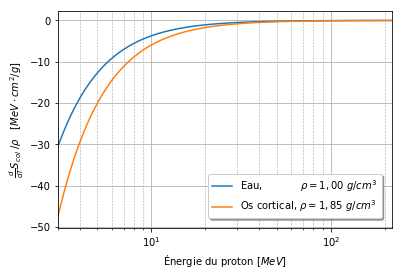

In [7]:
#dérivées des fonction
derivScol_eau = sympy.diff(Scol_subs(
    densite              = 1,            #g/cm**3
    excitation           = 75e-6,     #MeV
    densite_electronique = 5/9*nombre_avogadro),T)

derivScol_os_cortical = sympy.diff(Scol_subs(
    densite              = 1.85,             #g/cm**3
    excitation           = 106.4e-6, #MeV
    densite_electronique = 0.96*nombre_avogadro),T)

#lambdifications des fonctions pour accélérer les calculs
derivScol_eau = lambdify(T, derivScol_eau)
derivScol_os_cortical = lambdify(T, derivScol_os_cortical)

xvalues = [i for i in np.arange(3,220,0.01)]
plt.plot(xvalues, [derivScol_eau(i) for i in xvalues], label=r"Eau,            $\rho = 1,00\ g/cm^3$")
plt.plot(xvalues, [derivScol_os_cortical(i) for i in xvalues], label=r"Os cortical, $\rho = 1,85\ g/cm^3$")
plt.xscale('log')
plt.grid('True', which='Major')
plt.grid('True', which='Minor', ls='--', linewidth=0.6)
plt.xlabel(r'Énergie du proton $[MeV]$')
plt.ylabel(r"$\frac{d}{dT}S_{col}\;/\rho\quad[MeV\cdot cm^2/g]$")
plt.xlim([3, 220])
plt.legend(bbox_to_anchor=(0.45, 0.25), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.show()





## 8

Comme nous connaissons la dérivée du pouvoir d'arrêt, il est possible d'évaluer l'erreur d'approximation faite par l'intégration de $f(x)$ entre $a$ et $b$ avec la méthode des trapèzes. En effet, nous savons que:
\begin{align}
\epsilon = \frac{1}{12}h^2\left[f'(a) - f'(b) \right]
\end{align}
Par contre, on ne peut pas tout de suite utiliser le résultat du numéro précédent puisque nous intégrons l'inverse du pouvoir d'arrêt. Sa dérivée est alors:
\begin{align}
\frac{d}{dT}\frac{1}{Scol} = -\left(Scol\right)^{-2}\cdot \frac{d Scol}{dT}
\end{align}
On peut alors maintenant évaluer $\epsilon$ à l'aide du résultat précédent et trouver que:




In [8]:
Scol_eau =  Scol_subs(
    densite              = 1,            #g/cm**3
    excitation           = 75e-6,     #MeV
    densite_electronique = 5/9*nombre_avogadro)

Scol_os_cortical =Scol_subs(
    densite              = 1.85,             #g/cm**3
    excitation           = 106.4e-6, #MeV
    densite_electronique = 0.96*nombre_avogadro)

Scol_eau = lambdify(T, Scol_eau)
Scol_os_cortical = lambdify(T, Scol_os_cortical)

xvalues = [i for i in np.arange(3,220+0.01,0.01)]
eau_penet = [-Scol_eau(i)**(-2)*derivScol_eau(i) for i in xvalues]
os_penet = [-Scol_os_cortical(i)**(-2)*derivScol_os_cortical(i) for i in xvalues]

print("epsilon eau : {}".format(1/12*((220-3)/nombre_eau)**2*(eau_penet[0] - eau_penet[-1])))
print("epsilon os : {}".format(1/12*((220-3)/nombre_os_cortical)**2*(os_penet[0] - os_penet[-1])))



epsilon eau : 3.382630111050522e-10
epsilon os : 8.368184916285208e-10





Les valeurs analytiques tirées des dérivées sont:
\begin{align}
\epsilon_{eau}\ :\ 3.382630\times 10^{-10} cm \\
\epsilon_{os}\ \ :\ 8.368184\times 10^{-10} cm
\end{align}
Qui se comparent à nos valeurs calculées précédemment par méthode des trapèzes, qui sont
\begin{align}
\epsilon_{2N_{eau}}\ :\ 3.382598\times 10^{-10} cm  \\
\epsilon_{2N_{os}} \ :\ 8.368180\times 10^{-10} cm
\end{align}
On voit tout de suite que l'erreur d'approximation calculée lors de l'intégration est systématiquement sous son expression analytique, bien que les deux valeurs soient très près l'une de l'autre. Comme la différence entre la réponse numérique et analytique sont si près, on peut considérer qu'aucune faute ne s'est introduit dans notre intégration.

Comme l'erreur d'approximation calculée à partir de la dérivée est considérée à peu près égale à l'erreur d'arrondi, on remarque que la valeur de $10^{-9}cm$ de l'énoncé nous ammène directement au N optimal lors du calcul adaptatif. Une plus grande précision serait alors complètement inutile, puisqu'elle serait absorbée par la plus grande erreur d'arrondi.

## 9.
On s'intéresse ici à calculer la portée des protons dans l'eau à l'aide de la quadrature gaussienne. Pour ce faire, nous avons utilisé les routines écrites par Mark Newmann dans le fichier \textit{gaussxw.py}. Voulant obtenir le nombre de points $x_k$ nécessaires afin d'avoir une précision de $10^{-9}\ cm$, nous intégrons d'abord avec un nombre $N$ de points et comparons le résultat ($s_N$) avec celui qui serait obtenu pour $2N$ points ($s_{2N}$). Puis, lorsque l'écart $\epsilon = |s_N - s_{2N}|$ devient plus petit que $10^{-9}\ cm$, on note le nombre $N$ de points.


Temps requis pour trouver le N correspondant à une précision de 1e-9 cm:  16.9 secondes


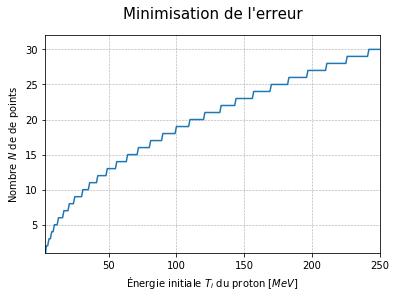

In [5]:

def get_n(N, a, b):
    """ Retourne le nombre de points nécessaire pour une précision de 10^{-9} cm
    
    :params:-------------Description-------------: Unités :
           
          N: Nombre de points                         -
          a: borne d'intégration inférieure          MeV
          b: borne(s) d'intégration supérieure(s)    MeV
    """
    
    n = []
    for b_i in b:
        erreur = 1
        N = 0
        while erreur > 1e-9: # Critère de convergence (10^{-9} cm)
            N += 1

            res_N = 0
            res_2N = 0

            x_N, w_N = gaussxwab(N, a, b_i)
            x_2N, w_2N = gaussxwab(2*N, a, b_i)

            res_N = np.sum(w_N/get_s_col(r_e, n_e_eau, x_N, I_eau))
            res_2N = np.sum(w_2N/get_s_col(r_e, n_e_eau, x_2N, I_eau))

            erreur = abs(res_N - res_2N)
    
        n.append(N-1)
        
    return n
    
b = np.arange(3, 251, 1)
start_err = timer()
n = get_n(0, 3, b)
end_err = timer()
err_time = np.round(end_err - start_err, 2)
print(r"Temps requis pour trouver le N correspondant à une précision de 1e-9 cm: ", err_time, "secondes")

plt.plot(b,n)
plt.xlabel('Énergie initiale $T_i$ du proton $[MeV]$')
plt.ylabel('Nombre $N$ de de points')
plt.title("Minimisation de l'erreur", y=1.05, fontsize=15)
plt.grid('True', which='Major', ls='--', linewidth=0.6)
plt.xlim([3,250])
plt.ylim([1,32])
plt.show()

Avec la figure ci dessus, on remarque que le nombre $N$ de points nécessaires afin d'obtenir une précision de $10^{-9}\ cm$ sur la portée du proton augmente avec l'énergie du proton. Cela s'explique par le fait qu'une augmentation d'énergie implique une augmentation du domaine d'intégration. Il devient donc nécessaire d'avoir plus de points pour avoir un résultat précis. Bref, pour l'énergie maximale de $250\ MeV$, 31 points sont nécessaires afin d'avoir la précision attendue.

Considérons maintenant une distribution de 10 000 protons. Celle-ci aura une énergie moyenne de $240\ MeV$ ainsi qu'un écart type de $3\ MeV$. On cherche ici à calculer la portée des protons en temps quasi-réel, ce qui implique que la rapidité de l'intégration doit être grande. Pour ce faire, il est nécessaire de trouver un nombre de points offrant un compromis entre rapidité et exactitude, autant pour la quadrature Gaussienne que pour l'intégration par trapèze. Puisque nous faisons un histogramme, l'erreur d'approximation fera changer certains protons de catégorie ("\textit{bin}") s'ils sont moins distants du bord du "bin" quel l'erreur sur leur portée. On peut alors simplement calculer la probabilité qu'un proton change de "bin" en fonction de l'erreur d'approximation pour trouver quelle erreur d'approximation est acceptable, donc quels paramètres utiliser dans nos fonctions d'intégration. Cette probabilité s'exprime, en pourcentage, comme:

\begin{align}
\%_{wrong\ bin} = \frac{Error}{bin\ width}\cdot 100  \label{err}
\end{align}

Comme nous connaissons aussi le nombre de protons simulés, on voudra utiliser un pourcentage assurant qu'en moyenne un seul proton change de "bin" à cause de l'erreur d'approximation sur sa portée. 

À partir de cette idée, nous avons calculé le nombre de points nécessaire afin de respecter ce critère. Pour la quadrature gaussienne, nous avons besoin de 15 points tandis que pour la méthode des trapèzes, 495 points (i.e. 494 trapèzes) sont nécessaires. Bref, une augmentation de ces nombre causerait un raffinement plus petit que la largeur des bins considérés causant ainsi une augmentation de résolution menant à aucun changement notable dans la distribution des portées. 


In [47]:
energie = np.random.normal(240, 3, 10000) # Obtention de la distribution d'énergie

Nombre de points nécessaire pour une erreur de 0.01% :  15
Temps requis pour calculer la portée de 10 000 protons :  0.61 secondes


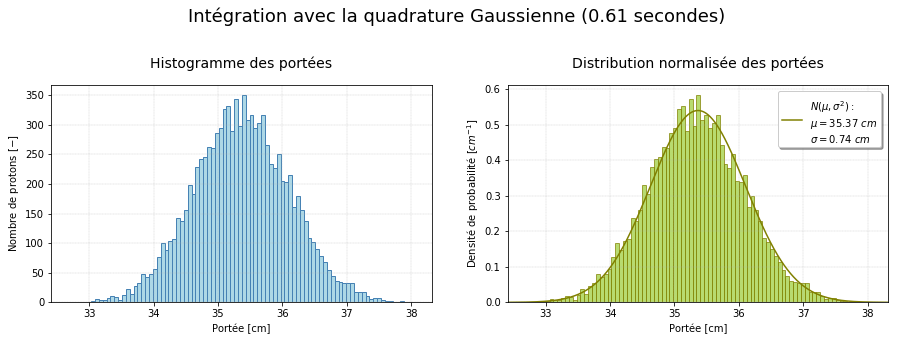

In [48]:
def translate_xw(x, w, a, b):
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def gauss_quad(N, b, a=3):
    res = []
    
    x, w = gaussxw(N)
    
    for b_i in b:
        x_i, w_i = translate_xw(x, w, a, b_i)
        
        s = sum(w_i/get_s_col(r_e, n_e_eau, x_i, I_eau))
            
        res.append(s)
        
    return res   

def calculate_points_number(func, typ, bin_width, wanted_fraction, max_energy = 220,\
                                               points_number = 1, error = 1337, prev = 0):
    wanted_error = wanted_fraction* bin_width
    while error > wanted_error:
        value_N = func(points_number, [max_energy])[0]
        value_2N = func(2*points_number, [max_energy])[0]
        if typ == 'trapz':
            error = abs(value_N - value_2N)/3
        if typ == 'gauss':
            error = abs(value_N - value_2N)
        
        points_number += 1
    return points_number, error

number, error = calculate_points_number(gauss_quad, 'gauss', 0.06, 1e-4, 220)

print('Nombre de points nécessaire pour une erreur de 0.01% : ', number)

start = timer()
portee_quad = gauss_quad(15, energie)
end = timer()

time_quad = np.round(end-start, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_quad, "secondes")

def normal_pdf(x, mu, sigma):
    return (np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi)))

def get_fitting_data(portee):
    
    # Moyenne et écart type de la distribution de portée
    mu = np.mean(portee)
    sigma = np.std(portee)

    # Création de la gaussienne
    x_fit = np.linspace(min(portee), max(portee), 10000)
    y = normal_pdf(x_fit, mu, sigma)

    # Hauteur, position des centres et largeur des bins
    n, x = np.histogram(portee, bins=100)
    wid = (x[1]-x[0])*np.ones(len(x))

    # Normalisation
    n = n/(sum(n)*wid[0])
    
    return mu, sigma, x_fit, y, n, x, wid


mu_quad, sigma_quad, x_fit_quad, y_quad, n_quad, x_quad, wid_quad = get_fitting_data(portee_quad)



def plot_histo(mu, sigma, x_fit, y, n, x, wid, portee, time, typ):
    fig, ax = plt.subplots(1,2, figsize=(15,4))

    ax[0].hist(portee, 100, color='lightblue', edgecolor='steelblue')
    ax[0].set_title('Histogramme des portées', y=1.05, fontsize=14)
    ax[0].set_ylabel('Nombre de protons $[-]$')
    ax[0].set_xlabel('Portée [cm]')
    ax[0].set_xlim([mu-4*sigma, mu+4*sigma])
    ax[0].grid('True', which='Major', ls='--', linewidth=0.3)

    ax[1].bar(x[:-1], n, wid[:-1], alpha = 0.7, color='yellowgreen', edgecolor='olive')
    ax[1].plot(x_fit, y, color='olive',\
               label="$N(\mu, \sigma^2) : $\n$\mu = {}\ cm $\n$\sigma = {}\ cm$".format(np.round(mu, 2), np.round(sigma, 2)))

    ax[1].set_xlabel('Portée [cm]')
    ax[1].set_ylabel('Densité de probabilité $[cm^{-1}]$')
    ax[1].set_title('Distribution normalisée des portées', y=1.05, fontsize=14)
    ax[1].set_xlim([mu-4*sigma, mu+4*sigma])
    ax[1].grid('True', which='Major', ls='--', linewidth=0.3)
    ax[1].legend(bbox_to_anchor=(0.71, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
    
    if typ == 'trapz':
        plt.suptitle('Intégration avec la méthode des trapèzes ({} secondes)'.format(time), fontsize=18, y=1.15)
    if typ == 'gauss':
        plt.suptitle('Intégration avec la quadrature Gaussienne ({} secondes)'.format(time), fontsize=18, y=1.15)
    if typ == 'sp':
        plt.suptitle('Intégration avec la méthode quad de Scipy ({} secondes)'.format(time), fontsize=18, y=1.15)
    
    plt.show()
    
    
plot_histo(mu_quad, sigma_quad, x_fit_quad, y_quad, n_quad, x_quad, wid_quad, portee_quad, time_quad, 'gauss')


Bref, en considérant 15 points pour l'intégration avec la quadrature gaussienne, on obtient un temps de calcul entre 0.6 et 0.9 secondes pour 10 000 protons en fonction du processeur utilisé (Intel i7 vs Intel i3). Cela correspond à un traitement d'entre  11 111 et 16 667 protons par seconde. À partir de la largeur des catégories de la distribution de portée et de \eqref{err}, nous avons commis une erreur de l'ordre de $10^{-6}\ cm$ sur la portée de chacun des protons, portée pour laquelle, en moyenne seulement 1 protons se voit être mal représenté pour nos paramètres. Pour obtenir une incertitude de l'ordre de $10^{-9}\ cm$, il nous aurais fallu considérer 31 points lors de l'intégration avec la méthode des trapèzes ce qui aurait résulté en une faible augmentation du temps de calcul (environ 2 fois plus de temps).



## 10.

On veut maintenant calculer la portée des protons en temps quasi-réel, mais avec la méthode des trapèzes. Sans considérer l'erreur d'intégration, on peut exprimer celle-ci mathématiquement comme,

\begin{align}
S(a,b) = h\left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]
\end{align}

Comme mentionné plus tôt, on utilisera 494 trapèzes lors de notre intégration afin d'avoir en moyenne un seul proton se retrouvant dans la mauvaise catégorie, ce qui correspond à $0.01 \%$ des protons considérés. 


Nombre de points nécessaire pour une erreur de 0.01% :  494
Temps requis pour calculer la portée de 10 000 protons :  2.09 secondes


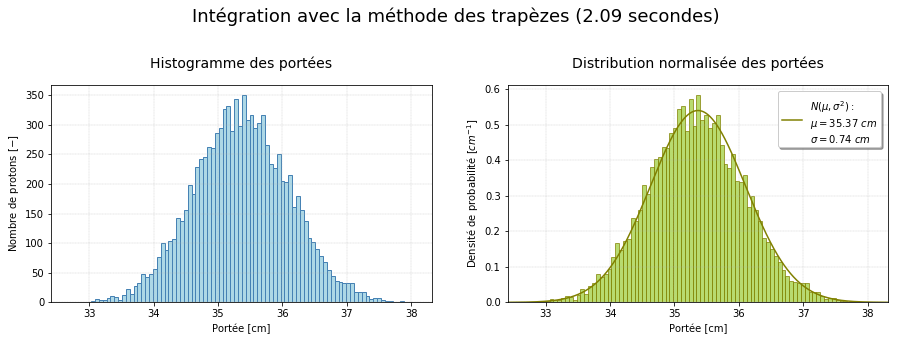

In [49]:


def trapz_integration(N, b, a=3):
    res = []
    for b_i in b:
        # Initialisation du domaine d'intégration
        points = np.linspace(a, b_i, N+1)
        h = (b_i-3)/N # Largeur des trapèzes
    
        f = 1/get_s_col(r_e, n_e_eau, points, I_eau) 
        s = h*(0.5*f[0] + sum(f[1: -1]) + 0.5*f[-1]) 
        
        res.append(s)  
    return res

number, error = calculate_points_number(trapz_integration, 'trapz', 0.06, 1e-4, 220)

print('Nombre de points nécessaire pour une erreur de 0.01% : ', number)

start_trapz = timer() # Début chronométrage
portee_trapz = trapz_integration(494, energie)
end_trapz = timer() # Fin chronométrage

time_trapz = np.round(end_trapz - start_trapz, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_trapz, "secondes")

mu_trapz, sigma_trapz, x_fit_trapz, y_trapz, n_trapz, x_trapz, wid_trapz = get_fitting_data(portee_trapz)
plot_histo(mu_trapz, sigma_trapz, x_fit_trapz, y_trapz, n_trapz, x_trapz, wid_trapz, portee_trapz, time_trapz, 'trapz')



## 11.

La librairie Scipy en est une remplie d'outils très utiles pour le calcul scientifique en python. Parmi ces nombreuses fonctions disponible, la fonction \textit{quad} du module \textit{integrate} permet d'intégrer numériquement une fonction unidimensionelle quelconque sur un intervalle fini ou infini. Ce dernier utilise des techniques originant de la librairie Fortran QUADPACK.

Cette librairie existe dans une version stable depuis 1987 et se trouve dans le domaine publique. Ses différents algorithmes d'intégration sont recconaissable à leur nom, une combinaison de 3-4 lettres commançant par Q. Ce nom représente le type d'intégration, et on peut voir les possibilités dans la figure suivante.
![image](https://raw.githubusercontent.com/eliedl/Physique_numerique/master/QUADPACK.PNG)
Source: https://en.wikipedia.org/wiki/QUADPACK

Après avoir jeté un coup d'oeil dans le code de la fonction quad, nous avons remarqué que dans notre cas, c'est la routine QAGP qui est utilisée. Celle-ci consiste à faire une intégration numérique à partir de la quadrature de Gauss-Konrod, une variante adaptative de la quadrature gaussienne, en prenant 21 points d'intérêt sur le domaine. QAGP utilise aussi ce qu'on appelle de l'accélération de séries, technique utilisée pour faire augmenter le taux de convergence de celles-ci. 

Code de la fonction quad : https://github.com/scipy/scipy/blob/v0.18.1/scipy/integrate/quadpack.py#L44-L359



Temps requis pour calculer la portée de 10 000 protons :  13.27 secondes


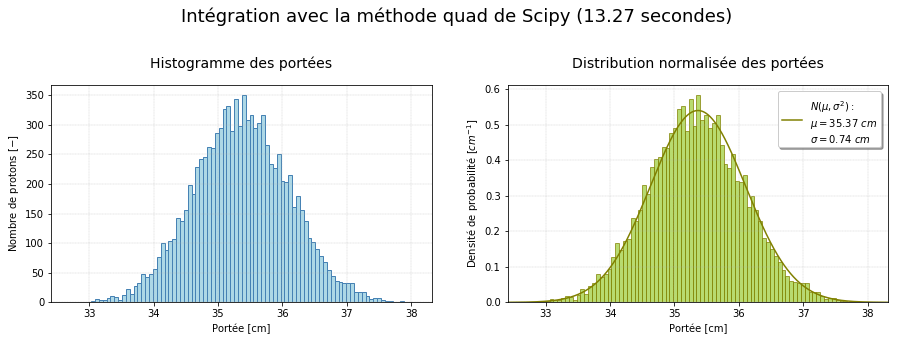

In [50]:

def scipy_integration(x):
    res = []
    for x_i in x:
        s = integrate.quad(lambda T: 1/get_s_col(r_e, n_e_eau, T, I_eau), 3, x_i, epsabs=1e-06)[0]
        res.append(s)
    return res

start_sc = timer()

portee_sp = scipy_integration(energie)

end_sc = timer()

time_sc = np.round(end_sc - start_sc, 2)

print("Temps requis pour calculer la portée de 10 000 protons : ", time_sc, "secondes")

mu_sp, sigma_sp, x_fit_sp, y_sp, n_sp, x_sp, wid_sp = get_fitting_data(portee_sp)
plot_histo(mu_sp, sigma_sp, x_fit_sp, y_sp, n_sp, x_sp, wid_sp, portee_sp, time_sc, 'sp')



### Discussion des différentes méthodes d'intégration et de leur rapidité


Dans les numéros 9, 10 et 11 nous avons testé la méthode de quadrature Gaussienne, la méthode des trapèzes et la méthode de quadrature adaptative de Scipy. Sans aucun doute, c'est la quadrature Gaussienne qui est la méthode optimale avec son temps de calcul sous la seconde pour 10 000 protons. Suivent ensuite la méthode des trapèzes, avec un temps d'exécution qui oscille près de 2 secondes en fonction du processeur, et la fonction quad de Scipy avec un temps de calcul excédant les 10 secondes. 

Bien sûr, plus on augmente la précision, plus le temps de calcul augmente car le nombre de points nécessaires sur le domaine d'intégration devient de plus en plus long, ce qui implique la gestion de vecteurs de plus en plus longs pour l'ordinateur. Pour les raisons mentionnées plus tôt, nous avons utilisé un précision de l'ordre de $10^{-6}\ cm$ lors la mesure de nos portées. L'exercice d'optimisation des méthodes d'intégration nous a fait prendre conscience de la longueur d'exécution de la boucle for en python. Par exemple, avec la méthode de quadrature gaussienne, une boucle for utilisée pour incrémenter le résultat de l'intégrale pour chaque points (i.e. for k in range(N) ... s+= ...) rallongait d'environ 5 secondes le processus d'intégration. Pour régler ce problème, nous avons opté pour une somme directe des valeurs contenues dans les vecteur de positions $x_k$ et de poids $w_k$.

Enfin, ce qui fait en sorte que la quadrature gaussienne est la méthode la plus efficace est son faible nombre de points nécessaire afin d'avoir la précision désirée. Comparativement à la méthode des trapèzes, qui requiert 495 points pour converger vers la précision désirée, la quadrature gaussienne en nécessite seulement 15. En ce qui concerne la méthode de Scipy, nous croyons que cette méthode est optimisée pour l'exactitude de sa réponse aux dépens de la rapidité. C'est peut-être aussi l'appel de la fonction pour chaque valeur d'énergie initiale (10 000) qui contribue à l'augmentation du temps de calcul global.


## 12. 


Temps requis pour calculer la portée de 10000 de protons :  0.0955 secondes
Taux de calcul : 104712.0 protons par seconde


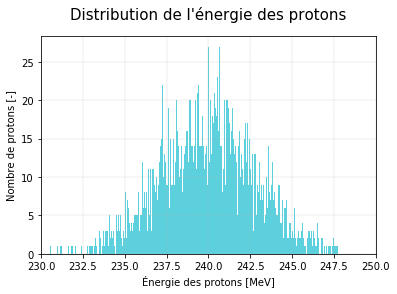

In [51]:
def weighted_avg_and_std(values, weights):
    """
    Retourne la moyenne et l'écart type à partir des poids.

    values, weights -- Numpy ndarrays ayant les mêmes dimensions.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

nombre_protons = 10000


start = timer()

protons = np.histogram(energie, 2000)

mat = []

count = protons[0][np.nonzero(protons[0])[0]]
e = protons[1][np.nonzero(protons[0])[0]]

mat = gauss_quad(15, e)

total = [count, mat]
end = timer()

time_opt = np.round(end - start, 4)


print("Temps requis pour calculer la portée de {} de protons : ".format(nombre_protons), time_opt, "secondes")
print("Taux de calcul : {} protons par seconde".format(np.round(nombre_protons/time_opt)))

plt.hist(protons[1][:-1], weights=protons[0], bins= 2000, alpha=0.7, color='C9')
plt.xlabel("Énergie des protons [MeV]")
plt.ylabel("Nombre de protons [-]")
plt.title("Distribution de l'énergie des protons", y=1.05, fontsize=15)
plt.xlim([230, 250])
plt.grid('True', which='Major', ls='--', linewidth=0.3)
plt.show()




On représente ci-haut la distribution de l'énergie de 10 000 protons dont l'énergie moyenne est de $240\ MeV$ et dont l'écart type est de $3\ MeV$ en les séparant dans 2000 catégories d'énergie.

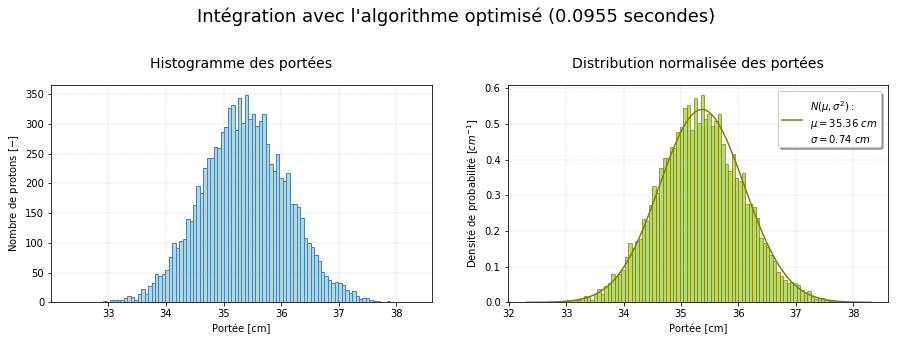

Différence entre l'alogrithme optimisé et la quadrature gaussienne : 

	 - Écart sur la moyenne :  1.499e-03 cm
	 - Écart sur la déviation standard :  7.776e-06 cm


In [52]:
mu_opt, sigma_opt = weighted_avg_and_std(mat, weights = count/(np.sum(count)))

x_fit_opt = np.linspace(min(mat), max(mat), 10000)
y_opt = normal_pdf(x_fit_opt, mu_opt, sigma_opt)

n_opt, x_opt = np.histogram(total[1],weights = total[0], bins=100)
wid_opt = (x_opt[1]-x_opt[0])*np.ones(len(x_opt))

n_opt = n_opt/(sum(n_opt)*wid_opt[0])

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].hist(total[1], weights=total[0], bins = 100, color='lightblue', edgecolor='steelblue')
ax[0].set_title('Histogramme des portées', y=1.05, fontsize=14)
ax[0].set_ylabel('Nombre de protons $[-]$')
ax[0].set_xlabel('Portée [cm]')
ax[0].grid('True', which='Major', ls='--', linewidth=0.3)
ax[1].bar(x_opt[:-1], n_opt, wid_opt[:-1], alpha = 0.7, color='yellowgreen', edgecolor='olive')
ax[1].plot(x_fit_opt, y_opt, color='olive',\
           label="$N(\mu, \sigma^2) : $\n$\mu = {}\ cm $\n$\sigma = {}\ cm$".format(np.round(mu_opt, 2), np.round(sigma_opt, 2)))

ax[1].set_xlabel('Portée [cm]')
ax[1].set_ylabel('Densité de probabilité $[cm^{-1}]$')
ax[1].set_title('Distribution normalisée des portées', y=1.05, fontsize=14)
ax[1].legend(bbox_to_anchor=(0.71, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
ax[1].grid('True', which='Major', ls='--', linewidth=0.3)
plt.suptitle("Intégration avec l'algorithme optimisé ({} secondes)".format(time_opt), fontsize=18, y=1.15)

plt.show()
delta_mu = abs(mu_opt - mu_quad)
delta_sigma = abs(sigma_opt - sigma_quad)

print("Différence entre l'alogrithme optimisé et la quadrature gaussienne : \n")
print("\t - Écart sur la moyenne : % 1.3e" % delta_mu + " cm")
print("\t - Écart sur la déviation standard : % 1.3e" % delta_sigma +" cm")

### Description de l'algorithme optimisé

Utilisant la quadrature gaussienne comme méthode d'intégration, notre algorithme optimisé consiste en les étapes suivantes: 

1. Créer un histogramme de l'énergie des protons
2. Utiliser la position du centre $c_i$ des catégories d'énergie pour calculer la portée $p_i$
3. Associer le nombre de protons de l'énergie $c_i$ au nombre de protons ayant la portée $p_i$

Avec cette méthode le nombre de catégories ("bins") correspond au "nombre de protons" considérés lors du calcul de la portée. Dans notre cas, nous avons remarqué qu'à partir de 2000 "bins" pour la distribution d'énergie, nous pouvions retrouver la distribution obtenue avec la méthode originale avec un écart de l'ordre de $10^{-3}\ cm$ sur la moyenne; tout cela en seulement 95 ms. De plus, la force de cette approche est qu'elle permet de considérer un nombre extrêmement grand de protons sans que le temps de calcul en soit tant affecté. Par exemple (Voir le code ci-dessous), si on va proche de la limite de la mémoire disponible pour créer un vecteur ($2\cdot 10^{7}$ protons), nous atteignons un taux de calcul de plus de 52 millions de protons par secondes.


Temps requis pour calculer la portée de 100000000 de protons :  1.5872 secondes
Taux de calcul : 63004032.0 protons par seconde


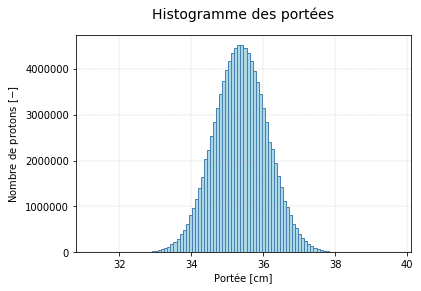

In [39]:
PUSH_THE_LIMIT = 100000000
energie_lim = np.random.normal(240, 3, PUSH_THE_LIMIT) 

start_lim = timer()

protons_lim = np.histogram(energie_lim, 2000)

count_lim = protons_lim[0][np.nonzero(protons_lim[0])[0]]
e_lim = protons_lim[1][np.nonzero(protons_lim[0])[0]]

res = gauss_quad(15, e_lim)

total = [count_lim, res]
end_lim = timer()

time_lim = np.round(end_lim - start_lim, 4)


print("Temps requis pour calculer la portée de {} de protons : ".format(PUSH_THE_LIMIT), time_lim, "secondes")
print("Taux de calcul : {} protons par seconde".format(np.round(PUSH_THE_LIMIT/time_lim)))
plt.hist(total[1], weights=total[0], bins = 100, color='lightblue', edgecolor='steelblue')
plt.title('Histogramme des portées', y=1.05, fontsize=14)
plt.ylabel('Nombre de protons $[-]$')
plt.xlabel('Portée [cm]')
plt.grid('True', which='Major', ls='--', linewidth=0.3)
plt.show()

Malheureusement, on ne peut pas comparer ce résultat avec la distribution utilisée plus tôt car ce calcul a nécessité l'appel d'une nouvelle distribution de protons. Malgré ce fait, on peut quand même remarquer l'efficacité de la méthode.

## 13
On sait qu'il est possible de calculer l'énergie déposée pour un pas de déplacement du proton comme :
$$ s = \int_{T_f}^{T_i} \frac{dT'}{S_{col}}$$
On veut alors écrire un algorithme capable de réaliser le transport des protons subissant une décélération
continue dans le milieu et tracer le dépôt d’énergie en fonction de la profondeur pour l’eau
et l’os de protons d’énergie cinétique 100 MeV. 


Pour ce faire, il est nécessaire d'engendrer un processus itératif. En effet, on commence avec une énergie de départ, 100 MeV, puis on calcule l'énergie perdue par le proton ($\Delta T$) après s'être déplacé d'un certain $\Delta s$. On prend en note ce $\Delta T$ et on le soustrait à l'énergie initiale. La nouvelle énergie est alors considérée comme énergie initiale et on recommence le processus jusqu'à ce que l'énergie tende vers 0. En ajoutant bou à bout ces incréments de distance, on se retrouve avec l'historique énergétique du proton, et on peut tracer le graphique voulu.



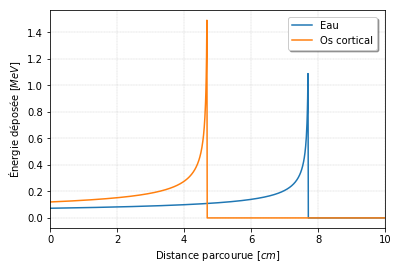

In [40]:
ds = 0.01
s_mat =[i for i in np.arange(0, 10, ds)]

def depot_energie(fonction, distance, energy = 100, step = 0.1):
    begin, end, N = 3, 100, 1000
    delta_T_mat = []
    for i in distance:
        if energy > 3:
            delta_T = ds*fonction(energy)
            energy -= delta_T
            delta_T_mat.append(delta_T)
        else: 
            delta_T_mat.append(0)
    return delta_T_mat

plt.plot(s_mat, depot_energie(Scol_eau, s_mat, step = ds), label = r"Eau")
plt.plot(s_mat, depot_energie(Scol_os_cortical, s_mat, step = ds), label=r"Os cortical")
plt.grid('True', which='Major', ls='--', linewidth=0.3)

plt.xlabel(r'Distance parcourue $[cm]$')
plt.ylabel(r"Énergie déposée $[MeV]$")
plt.xlim([0, 10])
plt.legend(bbox_to_anchor=(0.71, 0.97), loc=2, borderaxespad=0., fancybox=True, shadow=True)
plt.show()


## 14

Le pic de Bragg, qu'on observe dans le graphique précédent, montre que, lors de la pénétration, le proton va déposer la majorité de son énergie vers la fin de sa trajectoire. Cela permet, en radiothérapie, de traiter une zone précise en profondeur sans trop affecter les tissus entre l'emetteur et la zone à traiter. On note aussi qu'on y trouve même la longueur de pénétration sans avoir à évaluer l'intégrale. Cela va s'avérer utile dans les numéros suivants.




## 15
Comme nous voulons positionner le pic de Bragg sur la région à traiter, il suffit de calculer sa position en fonction de l'énergie initiale pour connaître quelle énergie traitera à quelle profondeur. Pour ce faire, on utilise la fonction définie au numéro 13 et on trouve son maximum pour toutes les énergies initiales de l'intervalle d'intérêt. On se retrouve ainsi avec la position du pic de Bragg en fonction de l'énergie initiale. On calcule ainsi l'énergie nécessaire à avoir le pic de Bragg à 4cm, qui donne :
$$ E_{4cm} = 69.39MeV$$

On note que la précision sur cette valeur est la même que la résolution du grapique produit. Le graphique en soit est assez long à générer avec la méthode du pic de Bragg, mais trouver une valeur d'énergie pour une certaine profondeur se fait instantanément.


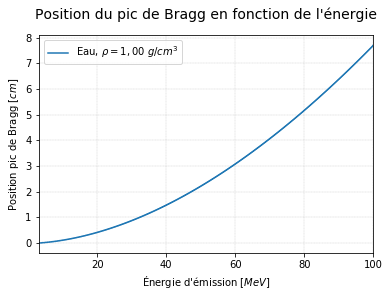

In [45]:

energy_mat = [i for i in np.arange(3, 100, 0.01)]
distance_mat = []
ds = 0.01
s_mat =[i for i in np.arange(0, 10, ds)]
for T in energy_mat:
    depo_mat = depot_energie(Scol_eau, s_mat, energy = T, step = ds)
    distance_mat.append(ds*np.argmax(depo_mat))
    
plt.plot(energy_mat, distance_mat, label = r"Eau, $\rho = 1,00\ g/cm^3$")
plt.xlabel(r"Énergie d'émission $[MeV]$")
plt.ylabel(r"Position pic de Bragg $[cm]$")
plt.xlim([3, 100])
plt.grid('True', which='Major', ls='--', linewidth=0.3)
plt.title("Position du pic de Bragg en fonction de l'énergie", y=1.05, fontsize=14)
plt.legend()
plt.show()

In [46]:
# Algorithme déterminant l'énergie du faisceau pour atteindre une distance donnée
distance_voulue = 4 #cm

prev = 0
for i in range(0,len(distance_mat)):
    if distance_voulue-distance_mat[i] < 0:
        index = i - (abs(distance_voulue-distance_mat[i-1]) > abs(distance_voulue-distance_mat[i]))
        value = energy_mat[index]
        break
print("Énergie pour traitement à {}cm : {}MeV".format(distance_voulue , np.round(value,2)))



Énergie pour traitement à 4cm : 69.44MeV


## 16

Bien qu'il soit facile de contrôler l'énergie des photons émis, il est difficile de contrôler à quelle profondeur ils vont déposer cette énergie. En effet, contrairement au protons, les photons déposent majoritairement leur énergie en surface. S'en suit une décroissance exponentielle de leur dépot d'énergie ayant une portée infinie. Cela leur permet d'être efficaces pour effectuer certains type d'incisions ainsi que de traiter des surfaces atteignables avec un instrument. Par contre, l'absence de limite fixe de propagation rend leur utilisation dangereuse près de zones sensibles. La figure suivante montre les pics de Bragg des photons et des protons. On observe facilement le manque de limite fixe de propagation des photons.

![image](https://upload.wikimedia.org/wikipedia/commons/1/12/BraggPeak.png)

Source : https://fr.wikipedia.org/wiki/Pic_de_Bragg

Comme les mélanomes oculaires se manifestent à la surface de l'oeil, on pourrait proposer les photons pour traiter ce type de cancer. Par contre, le problème de limite non fixe de la propagation entraîne des risques pour la rétine et le nerf optique, parties très sensibles aux rayonnements électromagnétiques située un peu plus profondément. Le proton ayant une limite fixe de propagation, il est ainsi un meilleur outil que le proton pour le traitement des mélanômes occulaires.





## 17

Notre modèle ne considère qu'une trajectoire rectiligne de proton au travers de la matière. Par contre, nous savons qu'un faisceau de protons, comme toute particule chargée, se diffuse en entrant dans un milieu comportant des particules chargées. 

En effet, la collision proton-électron ne fait pas que ralentir le proton, mais risque aussi de le faire dévier de sa trajectoire. Comme les protons vont dévier, on ne peut pas se fier à 100% aux calculs effectués précédemment sur la densité d'énergie déposée sur la zone traitée.

Le pic de Bragg d'un seul proton est donc encore à la même distance sur la trajectoire, mais c'est la trajectoire elle-même qui va suivre une distribution de déviations causées par les collisions.

Il faudrait donc calculer la densité de probabilité linéique de collision ainsi que la densité de probabilité sur l'angle de déviation suite à une collision pour obtenir une distribution sur la position finale du pic de Bragg d'un proton. Le produit des distributions de densité de probabilité sur les trajectoire ainsi que l'énergie sur ces trajectoire nous donnerait alors la densité énergétique d'absorption pour un faisceau de protons. Une représentation artistique de ces deux distributions ainsi que de la distribution d'énergie résultante se retrouve plus bas:
![Image](https://github.com/eliedl/Physique_numerique/blob/master/nouveau_modeleV2.png?raw=true)

Comme cette distribution sera symétrique en terme de rotation, il suffit de calculer une tranche 2D comme mentionné plus tôt et d'appliquer une rotation pour obtenir une carte tridimensionnelle de dépôt d'énergie par unité de volume. Avec cette carte, il sera possible de mieux planifier les opérations chirurgicales en connaissant non seulement l'énergie transmise à la région à traitée, mais aussi la quantité d'énergie débordant de cette région.


# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-newhauser2015physics" href="#call-newhauser2015physics">?</a>) !! _This reference was not found in biblio.bib _ !!

(<a id="cit-NIST" href="#call-NIST">?</a>) !! _This reference was not found in biblio.bib _ !!

